In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")
data=pd.read_csv(r"C:\Users\nehas\OneDrive\Desktop\datasets\diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [2]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
data.shape

(100000, 9)

In [6]:
data.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [7]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
#datatype conversion

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
data.gender=le.fit_transform(data.gender)
data.smoking_history=le.fit_transform(data.smoking_history)

In [12]:
data.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [13]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [15]:
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80000, 8), (20000, 8), (80000,), (20000,))

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [19]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
dt_p=dt.predict(x_test)
dt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
dt_m=confusion_matrix(dt_p,y_test)
dt_m

array([[17818,   455],
       [  516,  1211]], dtype=int64)

In [22]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

95.145

In [23]:
dt.feature_importances_

array([0.0132331 , 0.06667002, 0.00710156, 0.00436434, 0.02558998,
       0.11924131, 0.49461254, 0.26918715])

In [24]:
dt1=pd.DataFrame({"importances":list(dt.feature_importances_),"columns":list(x)})
dt1

,importances,columns
0,0.013233,gender
1,0.066670,age
2,0.007102,hypertension
3,0.004364,heart_disease
4,0.025590,smoking_history
5,0.119241,bmi
6,0.494613,HbA1c_level
7,0.269187,blood_glucose_level


In [25]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18273
           1       0.73      0.70      0.71      1727

    accuracy                           0.95     20000
   macro avg       0.85      0.84      0.84     20000
weighted avg       0.95      0.95      0.95     20000



In [26]:
p_1=precision_score(dt_p,y_test)
r1=recall_score(dt_p,y_test)
f1=f1_score(dt_p,y_test)
p_1

0.726890756302521

# Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [28]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
rf_p=rf.predict(x_test)
rf_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
rf_m=confusion_matrix(rf_p,y_test)
rf_m

array([[18270,   544],
       [   64,  1122]], dtype=int64)

In [31]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

96.96000000000001

In [32]:
#print(classification_report(rf_p,y_test))

In [33]:
p2=precision_score(rf_p,y_test)
r2=recall_score(rf_p,y_test)
f2=f1_score(rf_p,y_test)

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
knn_p=knn.predict(x_test)
knn_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
knn_m=confusion_matrix(knn_p,y_test)
knn_m

array([[18222,   803],
       [  112,   863]], dtype=int64)

In [38]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

95.42500000000001

In [39]:
p3=precision_score(knn_p,y_test)
r3=recall_score(knn_p,y_test)
f3=f1_score(knn_p,y_test)

In [40]:
lst=list()

In [41]:
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p=knn.predict(x_test)
    c=confusion_matrix(p,y_test)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

In [42]:
lst

[94.125,
 95.41,
 95.22500000000001,
 95.42500000000001,
 95.42500000000001,
 95.36,
 95.38499999999999,
 95.22,
 95.285]

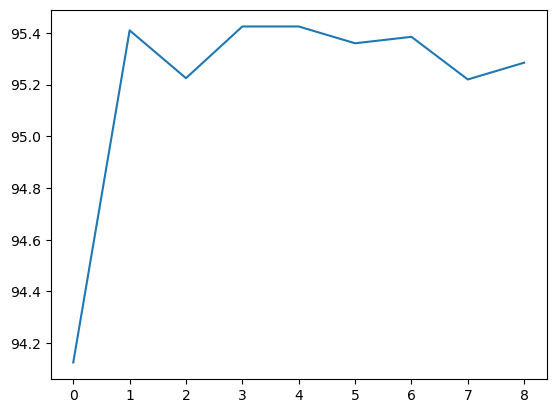

In [43]:
p1=plt.plot(lst)

# Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [45]:
nb.fit(x_train,y_train)

MultinomialNB()

In [46]:
nb_p=nb.predict(x_test)
nb_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
nb_m=confusion_matrix(nb_p,y_test)
nb_m

array([[17643,  1207],
       [  691,   459]], dtype=int64)

In [48]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

90.51

In [49]:
p4=precision_score(nb_p,y_test)
r4=recall_score(nb_p,y_test)
f4=f1_score(nb_p,y_test)

# SVM

In [50]:
from sklearn.svm import SVC
svc=SVC()

In [51]:
svc.fit(x_train,y_train)

SVC()

In [52]:
svc_p=svc.predict(x_test)
svc_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
svc_m=confusion_matrix(svc_p,y_test)
svc_m

array([[18334,  1034],
       [    0,   632]], dtype=int64)

In [54]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

94.83

In [55]:
p5=precision_score(svc_p,y_test)
r5=recall_score(svc_p,y_test)
f5=f1_score(svc_p,y_test)

# Logisic reg

In [56]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [57]:
lg.fit(x_train,y_train)

LogisticRegression()

In [58]:
lg_p=lg.predict(x_test)
lg_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
pred_prob=lg.predict_proba(x_test)
pred_prob

array([[9.93566778e-01, 6.43322205e-03],
       [9.88286535e-01, 1.17134648e-02],
       [9.94002656e-01, 5.99734403e-03],
       ...,
       [6.50167600e-01, 3.49832400e-01],
       [9.80861845e-01, 1.91381546e-02],
       [9.99479287e-01, 5.20712865e-04]])

In [60]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[18104,   739],
       [  230,   927]], dtype=int64)

In [61]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

95.155

In [62]:
p6=precision_score(lg_p,y_test)
r6=recall_score(lg_p,y_test)
f6=f1_score(lg_p,y_test)

# Boosting

In [63]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [64]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [65]:
adbo_p=adbo.predict(x_test)
adbo_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
adbo_m=confusion_matrix(adbo_p,y_test)
adbo_m

array([[17907,   473],
       [  427,  1193]], dtype=int64)

In [67]:
adbo_acc=adbo_m.diagonal().sum()/adbo_m.sum()*100
adbo_acc

95.5

In [68]:
p_7=precision_score(adbo_p,y_test)
r7=recall_score(adbo_p,y_test)
f7=f1_score(adbo_p,y_test)

# XG Boost

In [69]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [70]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
xgb_p=xgb.predict(x_test)
xgb_p

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
xgb_m=confusion_matrix(xgb_p,y_test)
xgb_m

array([[18290,   543],
       [   44,  1123]], dtype=int64)

In [73]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

97.065

In [74]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18833
           1       0.67      0.96      0.79      1167

    accuracy                           0.97     20000
   macro avg       0.84      0.97      0.89     20000
weighted avg       0.98      0.97      0.97     20000



In [75]:
p8=precision_score(xgb_p,y_test)
r8=recall_score(xgb_p,y_test)
f8=f1_score(xgb_p,y_test)
p8

0.6740696278511404

# Feature Selection

In [76]:
cst=SelectKBest(score_func=chi2,k="all").fit(x_train,y_train)

In [77]:
s_f=pd.DataFrame({"feature":list(x_train.columns),
                 "score":cst.scores_})
s_f.sort_values(by="score",ascending=False)

,feature,score
7,blood_glucose_level,171807.728150
1,age,64789.126934
5,bmi,5911.802561
2,hypertension,2864.197983
6,HbA1c_level,2706.010878
3,heart_disease,2217.257117
4,smoking_history,1160.421160
0,gender,62.689007


In [78]:
x_train_chi=cst.transform(x_train)
x_test_chi=cst.transform(x_test)

In [79]:
x_train_chi[0:3]

array([[  1.  ,  43.  ,   0.  ,   0.  ,   4.  ,  23.17,   4.  , 140.  ],
       [  0.  ,  47.  ,   0.  ,   0.  ,   1.  ,  28.53,   6.6 , 200.  ],
       [  0.  ,  73.  ,   0.  ,   1.  ,   4.  ,  38.32,   6.5 , 140.  ]])

In [80]:
rf_chi_model=rf.fit(x_train_chi,y_train)

In [81]:
rfs_p=rf_chi_model.predict(x_test)
rfs_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
rfs_m=confusion_matrix(rfs_p,y_test)
rfs_m

array([[18264,   546],
       [   70,  1120]], dtype=int64)

In [83]:
fs_acc=rfs_m.diagonal().sum()/rfs_m.sum()*100
fs_acc

96.92

In [84]:
p9=precision_score(rfs_p,y_test)
r9=recall_score(rfs_p,y_test)
f9=f1_score(rfs_p,y_test)


In [85]:
l1=["DT","RF","KNN","NB","SVM","Logistic","Ada-Boost","Xgb-Boost","feature_selection"]
l2=[dt_acc,rf_acc,knn_acc,nb_acc,svc_acc,lg_acc,adbo_acc,xgb_acc,fs_acc]
l3=[p_1,p2,p3,p4,p5,p6,p_7,p8,p9]
l4=[r1,r2,r3,r4,r5,r6,r7,r8,r9]
l5=[f1,f2,f3,f4,f5,f6,f7,f8,f9]

In [86]:
final=pd.DataFrame({"Modelname":l1,"Accuracy":l2,"Precision":l3,"Recall":l4,"F1_score":l5})
final

,Modelname,Accuracy,Precision,Recall,F1_score
0,DT,95.145,0.726891,0.701216,0.713823
1,RF,96.960,0.673469,0.946037,0.786816
2,KNN,95.425,0.518007,0.885128,0.653540
3,NB,90.510,0.275510,0.399130,0.325994
4,SVM,94.830,0.379352,1.000000,0.550044
5,Logistic,95.155,0.556423,0.801210,0.656748
6,Ada-Boost,95.500,0.716086,0.736420,0.726111
7,Xgb-Boost,97.065,0.674070,0.962296,0.792799
8,feature_selection,96.920,0.672269,0.941176,0.784314


# Visualization

<Axes: xlabel='diabetes', ylabel='count'>

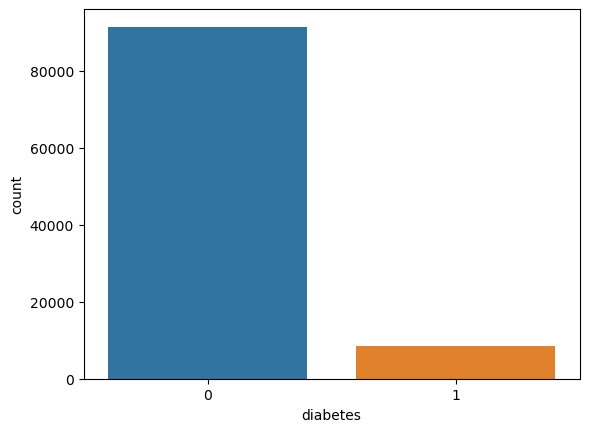

In [87]:
sns.countplot(x = 'diabetes',data = data)

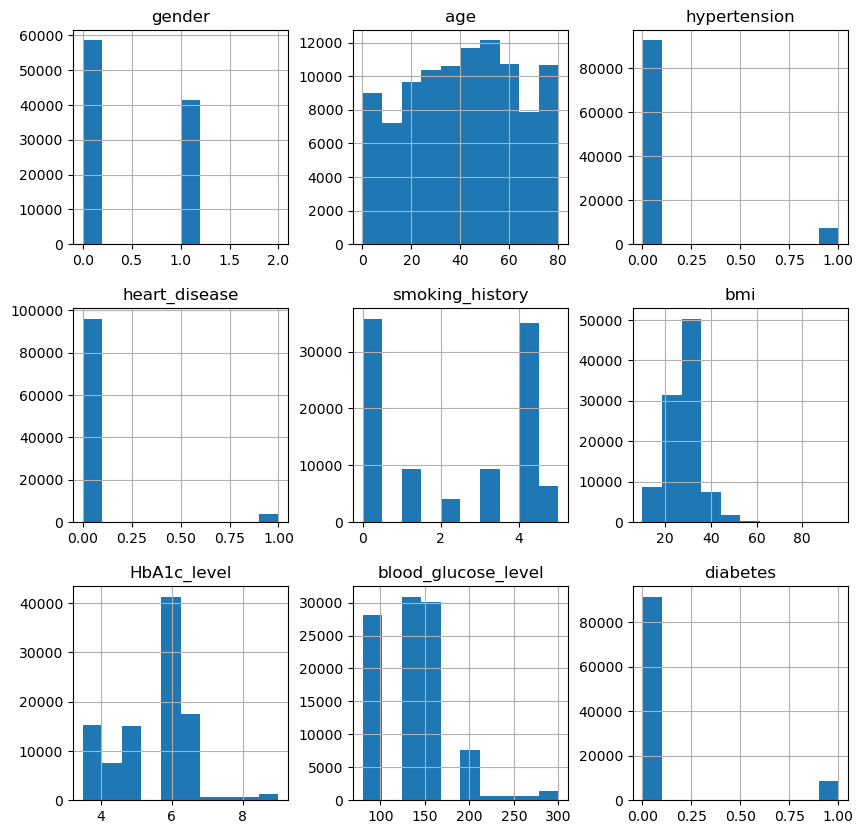

In [88]:
data.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

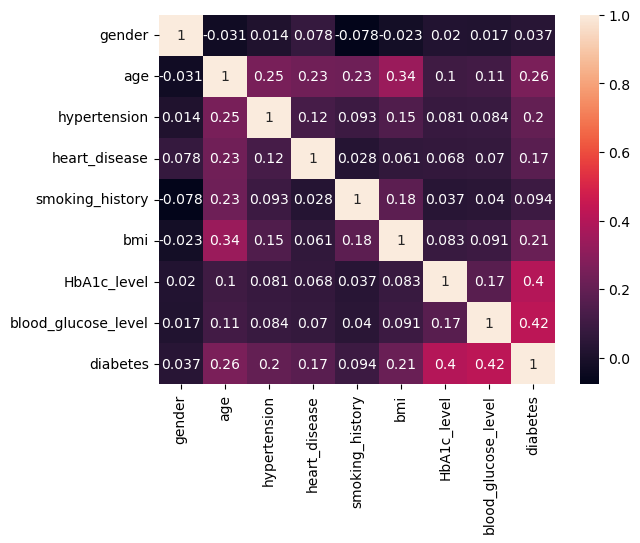

In [89]:
#correlation

sns.heatmap(data.corr(),annot=True)

# class imbalance

In [90]:
c_0,c_1=data["diabetes"].value_counts()

In [91]:
c_0,c_1

(91500, 8500)

In [92]:
hr_0=data[data["diabetes"]==0]
hr_1=data[data["diabetes"]==1]

In [93]:
hr_0.shape,hr_1.shape

((91500, 9), (8500, 9))

In [94]:
class_0under=hr_0.sample(c_1)

In [95]:
class_0under.shape

(8500, 9)

In [96]:
class0_1=pd.concat([class_0under,hr_1],axis=0)

In [97]:
class0_1.shape

(17000, 9)

In [98]:
class0_1.diabetes.value_counts()

diabetes
0    8500
1    8500
Name: count, dtype: int64

# split data

In [99]:
x=class0_1.iloc[:,:-1]
y=class0_1.iloc[:,-1]

In [100]:
x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
86930,0,32.0,0,0,0,26.95,6.2,158
62182,1,6.0,0,0,0,17.35,6.5,160
30410,1,33.0,0,0,0,27.32,6.1,80
57040,1,55.0,0,0,1,31.09,6.6,155
84043,1,77.0,0,0,3,25.78,6.1,126


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [102]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13600, 8), (3400, 8), (13600,), (3400,))

# Outlier tretment

In [103]:
a=class0_1["age"]

In [104]:
#detecting the outliers
#1 method
outlier=[]
def detect_outlier(a):
    threshold=3
    mean=np.mean(a)
    std=np.std(a)
    for i in a:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [105]:
detect_outlier(a)

[]

In [106]:
class0_1


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
86930,0,32.0,0,0,0,26.95,6.2,158,0
62182,1,6.0,0,0,0,17.35,6.5,160,0
30410,1,33.0,0,0,0,27.32,6.1,80,0
57040,1,55.0,0,0,1,31.09,6.6,155,0
84043,1,77.0,0,0,3,25.78,6.1,126,0
...,...,...,...,...,...,...,...,...,...
99935,0,65.0,1,1,4,33.55,8.2,140,1
99938,1,55.0,0,1,3,30.42,6.2,300,1
99957,0,61.0,0,0,0,34.45,6.5,280,1
99962,0,58.0,1,0,4,38.31,7.0,200,1


<Axes: xlabel='age', ylabel='Density'>

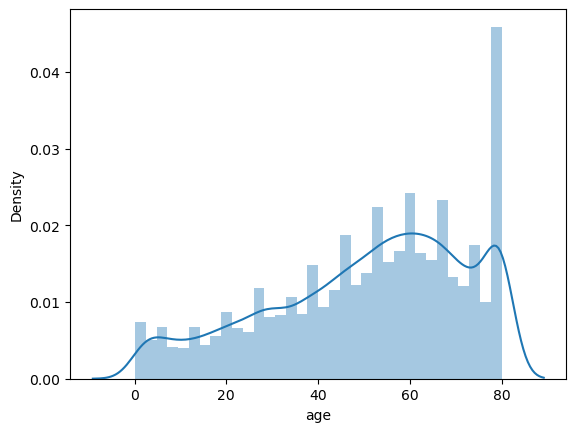

In [107]:
sns.distplot(class0_1["age"])

<Axes: ylabel='age'>

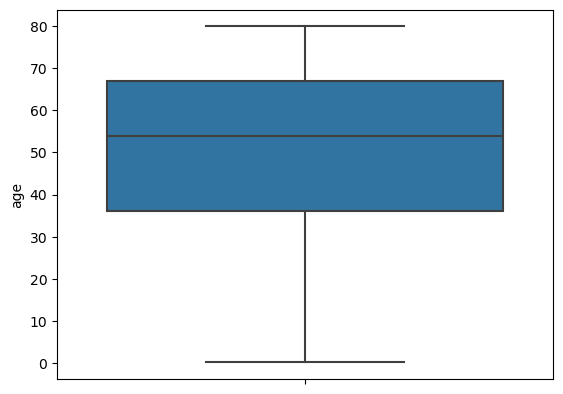

In [108]:
sns.boxplot(data=class0_1,y="age")

<Axes: xlabel='bmi', ylabel='Density'>

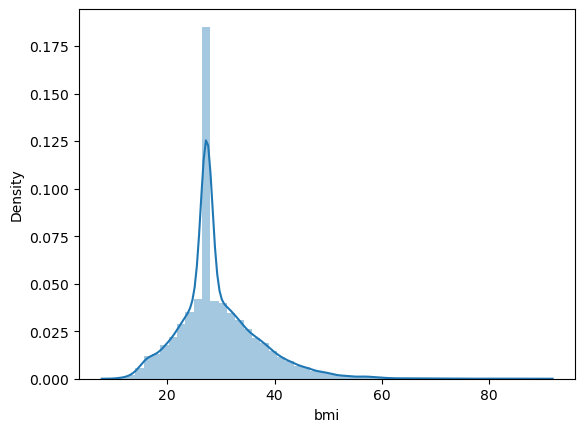

In [109]:
sns.distplot(class0_1["bmi"])

<Axes: ylabel='bmi'>

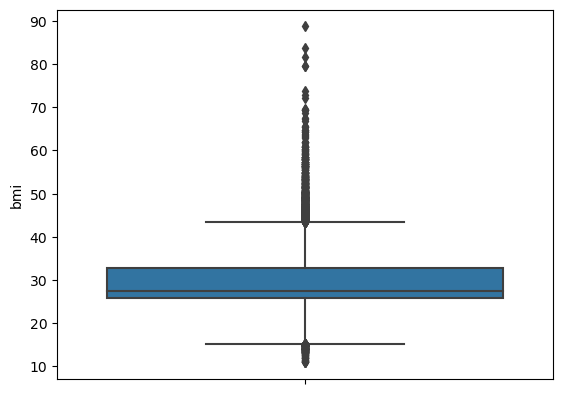

In [110]:
sns.boxplot(data=class0_1,y="bmi")

In [111]:
IQR=class0_1["bmi"].quantile(0.75)-class0_1["bmi"].quantile(0.25)
IQR

7.032499999999999

In [112]:
lb1=class0_1["bmi"].quantile(0.25)-(IQR*3)
ub1=class0_1["bmi"].quantile(0.75)+(IQR*3)
print(lb1,ub1)

4.6825000000000045 53.91


In [113]:
class0_1.loc[class0_1["bmi"]>53,"bmi"]=53

<Axes: ylabel='bmi'>

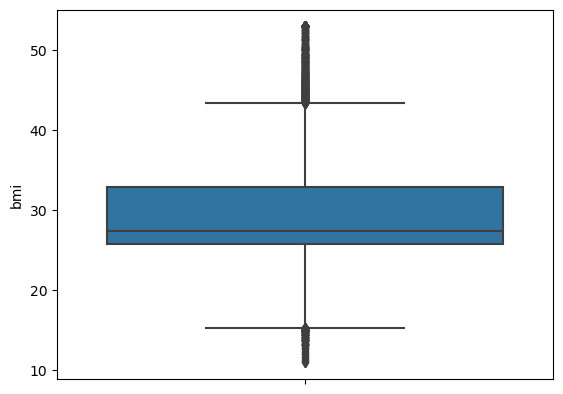

In [114]:
sns.boxplot(data=class0_1,y="bmi")

<Axes: xlabel='bmi', ylabel='Density'>

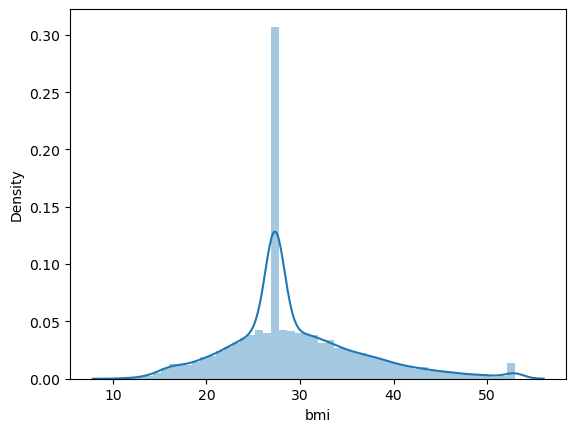

In [115]:
sns.distplot(class0_1["bmi"])

<Axes: xlabel='HbA1c_level', ylabel='Density'>

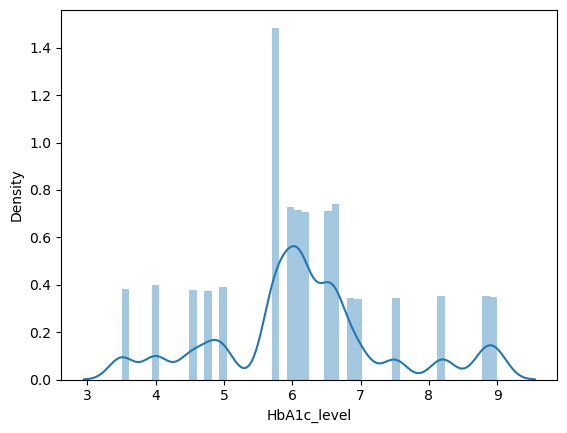

In [116]:
sns.distplot(class0_1["HbA1c_level"])

<Axes: ylabel='HbA1c_level'>

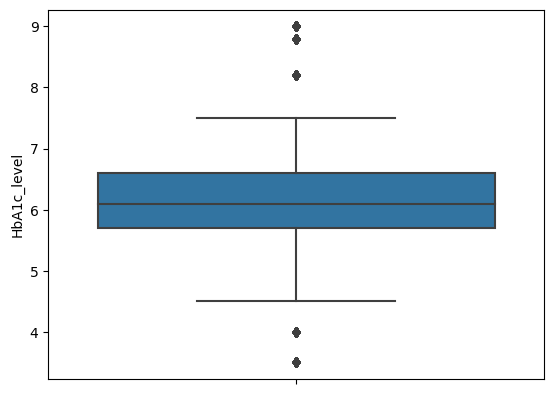

In [117]:
sns.boxplot(data=class0_1,y="HbA1c_level")

In [118]:
IQR=class0_1["HbA1c_level"].quantile(0.75)-class0_1["HbA1c_level"].quantile(0.25)
IQR

0.8999999999999995

In [119]:
lb1=class0_1["HbA1c_level"].quantile(0.25)-(IQR*3)
ub1=class0_1["HbA1c_level"].quantile(0.75)+(IQR*3)
print(lb1,ub1)

3.0000000000000018 9.299999999999997


In [120]:
class0_1.loc[class0_1["bmi"]>9.2999,"bmi"]=9.2999

<Axes: ylabel='HbA1c_level'>

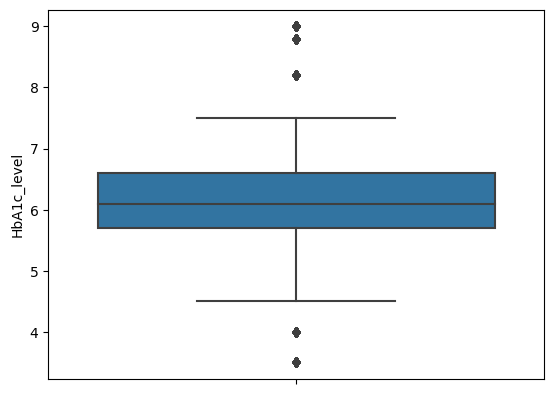

In [121]:
sns.boxplot(data=class0_1,y="HbA1c_level")

<Axes: ylabel='blood_glucose_level'>

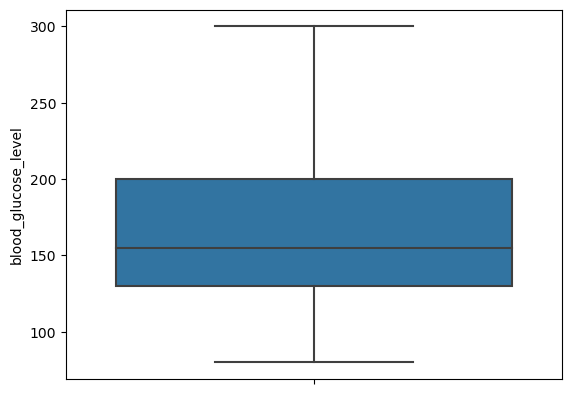

In [122]:
sns.boxplot(data=class0_1,y="blood_glucose_level")

# Model Building

# decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [124]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [125]:
dt_p=dt.predict(x_test)
dt_p

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [126]:
dt_m=confusion_matrix(dt_p,y_test)
dt_m

array([[1477,  214],
       [ 192, 1517]], dtype=int64)

In [127]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

88.05882352941177

In [128]:
p1=precision_score(dt_p,y_test)
r1=recall_score(dt_p,y_test)
f1=f1_score(dt_p,y_test)


# Random forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [130]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [131]:
rf_p=rf.predict(x_test)
rf_p

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [132]:
rf_m=confusion_matrix(rf_p,y_test)
rf_m

array([[1499,  162],
       [ 170, 1569]], dtype=int64)

In [133]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

90.23529411764706

In [134]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1661
           1       0.91      0.90      0.90      1739

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [135]:
roc1=roc_auc_score(rf_p,y_test)
roc1

0.9023555303673664

In [136]:
rf_df=pd.DataFrame(rf_p)
rf_df

,0
0,0
1,1
2,1
3,0
4,1
...,...
3395,0
3396,0
3397,1
3398,0


In [137]:
precision,recall,threshold=precision_recall_curve(y_test,rf_df)
precision

array([0.50911765, 0.90224267, 1.        ])

Text(0.5, 1.0, 'PRC-CURVE')

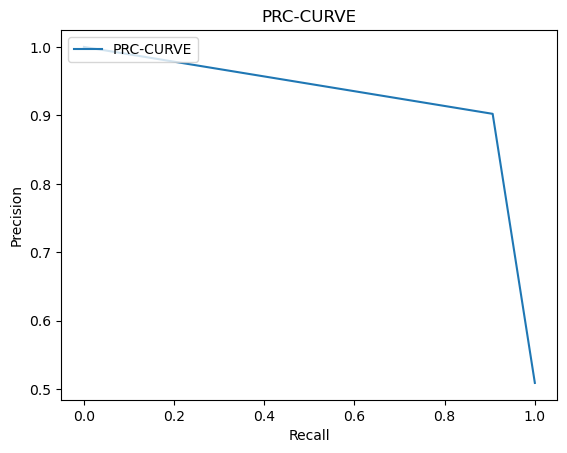

In [138]:
plt.plot(recall,precision,label="PRC-CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

In [139]:
p2=precision_score(rf_p,y_test)
r2=recall_score(rf_p,y_test)
f2=f1_score(rf_p,y_test)

# KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [141]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [142]:
knn_p=knn.predict(x_test)
knn_p

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [143]:
knn_m=confusion_matrix(knn_p,y_test)
knn_m

array([[1404,  240],
       [ 265, 1491]], dtype=int64)

In [144]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

85.1470588235294

In [145]:
print(classification_report(knn_p,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1644
           1       0.86      0.85      0.86      1756

    accuracy                           0.85      3400
   macro avg       0.85      0.85      0.85      3400
weighted avg       0.85      0.85      0.85      3400



In [146]:
p3=precision_score(knn_p,y_test)
r3=recall_score(knn_p,y_test)
f3=f1_score(knn_p,y_test)

# Naive Bayes

In [147]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [148]:
nb.fit(x_train,y_train)

MultinomialNB()

In [149]:
nb_p=nb.predict(x_test)
nb_p

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [150]:
nb_m=confusion_matrix(nb_p,y_test)
nb_m

array([[1124,  569],
       [ 545, 1162]], dtype=int64)

In [151]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

67.23529411764706

In [152]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      1693
           1       0.67      0.68      0.68      1707

    accuracy                           0.67      3400
   macro avg       0.67      0.67      0.67      3400
weighted avg       0.67      0.67      0.67      3400



In [153]:
p4=precision_score(nb_p,y_test)
r4=recall_score(nb_p,y_test)
f4=f1_score(nb_p,y_test)

# SVM

In [154]:
from sklearn.svm import SVC
svc=SVC()

In [155]:
svc.fit(x_train,y_train)

SVC()

In [156]:
svc_p=svc.predict(x_test)
svc_p

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [157]:
svc_m=confusion_matrix(svc_p,y_test)
svc_m

array([[1376,  169],
       [ 293, 1562]], dtype=int64)

In [158]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

86.41176470588235

In [159]:
print(classification_report(svc_p,y_test))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1545
           1       0.90      0.84      0.87      1855

    accuracy                           0.86      3400
   macro avg       0.86      0.87      0.86      3400
weighted avg       0.87      0.86      0.86      3400



In [160]:
p5=precision_score(svc_p,y_test)
r5=recall_score(svc_p,y_test)
f5=f1_score(svc_p,y_test)

# Logistic Reg

In [161]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [162]:
lg.fit(x_train,y_train)

LogisticRegression()

In [163]:
lg_p=lg.predict(x_test)
lg_p

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [164]:
pred_prob=lg.predict_proba(x_test)
pred_prob

array([[9.98462992e-01, 1.53700848e-03],
       [1.10772515e-02, 9.88922748e-01],
       [7.69289911e-01, 2.30710089e-01],
       ...,
       [1.55141353e-04, 9.99844859e-01],
       [4.94845050e-01, 5.05154950e-01],
       [9.77522705e-01, 2.24772946e-02]])

In [165]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[1502,  205],
       [ 167, 1526]], dtype=int64)

In [166]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

89.05882352941177

In [167]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1707
           1       0.88      0.90      0.89      1693

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400



In [168]:
p6=precision_score(lg_p,y_test)
r6=recall_score(lg_p,y_test)
f6=f1_score(lg_p,y_test)

# Boosting

In [169]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [170]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [171]:
adbo_p=adbo.predict(x_test)
adbo_p

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [172]:
adbo_m=confusion_matrix(adbo_p,y_test)
adbo_m

array([[1469,  193],
       [ 200, 1538]], dtype=int64)

In [173]:
adbo_acc=adbo_m.diagonal().sum()/adbo_m.sum()*100
adbo_acc

88.44117647058823

In [174]:
print(classification_report(adbo_p,y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1662
           1       0.89      0.88      0.89      1738

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



In [175]:
p_7=precision_score(adbo_p,y_test)
r7=recall_score(adbo_p,y_test)
f7=f1_score(adbo_p,y_test)

# XG Boost

In [176]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [177]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [178]:
xgb_p=xgb.predict(x_test)
xgb_p

array([0, 1, 0, ..., 1, 1, 0])

In [179]:
xgb_m=confusion_matrix(xgb_p,y_test)
xgb_m

array([[1510,  144],
       [ 159, 1587]], dtype=int64)

In [180]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

91.08823529411765

In [181]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1654
           1       0.92      0.91      0.91      1746

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [182]:
p8=precision_score(xgb_p,y_test)
r8=recall_score(xgb_p,y_test)
f8=f1_score(xgb_p,y_test)

# Feature Selection

In [183]:
cst=SelectKBest(score_func=chi2,k="all").fit(x_train,y_train)

In [184]:
x_train_chi=cst.transform(x_train)
x_test_chi=cst.transform(x_test)

In [185]:
x_train_chi[0:3]

array([[  1.  ,  80.  ,   1.  ,   1.  ,   4.  ,  30.83,   5.8 , 145.  ],
       [  1.  ,  66.  ,   1.  ,   1.  ,   1.  ,  27.32,   7.5 , 145.  ],
       [  1.  ,  57.  ,   0.  ,   0.  ,   4.  ,  30.82,   6.  ,  85.  ]])

In [186]:
rf_chi_model=rf.fit(x_train_chi,y_train)

In [187]:
rfs_p=rf_chi_model.predict(x_test)
rfs_p

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [188]:
rfs_m=confusion_matrix(rfs_p,y_test)
rfs_m

array([[1506,  157],
       [ 163, 1574]], dtype=int64)

In [189]:
fs_acc=rfs_m.diagonal().sum()/rfs_m.sum()*100
fs_acc

90.58823529411765

In [190]:
p9=precision_score(rfs_p,y_test)
r9=recall_score(rfs_p,y_test)
f9=f1_score(rfs_p,y_test)


In [191]:
l1=["DT","RF","KNN","NB","SVM","Logistic","Ada-Boost","XG-Boost","Feature_selection"]
l2=[dt_acc,rf_acc,knn_acc,nb_acc,svc_acc,lg_acc,adbo_acc,xgb_acc,fs_acc]
l3=[p1,p2,p3,p4,p5,p6,p_7,p8,p9]
l4=[r1,r2,r3,r4,r5,r6,r7,r8,r9]
l5=[f1,f2,f3,f4,f5,f6,f7,f8,f9]

In [192]:
final=pd.DataFrame({"Modelname":l1,"Accuracy":l2,"Precision":l3,"Recall":l4,"F1_score":l5})
final

,Modelname,Accuracy,Precision,Recall,F1_score
0,DT,88.058824,0.876372,0.887654,0.881977
1,RF,90.235294,0.906412,0.902243,0.904323
2,KNN,85.147059,0.861352,0.849089,0.855176
3,NB,67.235294,0.671288,0.680726,0.675974
4,SVM,86.411765,0.902369,0.842049,0.871166
5,Logistic,89.058824,0.881571,0.901359,0.891355
6,Ada-Boost,88.441176,0.888504,0.884925,0.886711
7,XG-Boost,91.088235,0.916811,0.908935,0.912856
8,Feature_selection,90.588235,0.909301,0.906160,0.907728


In [193]:
#the XG Boost  model performs the best with an accuracy of 91%
#Based on the F1 score, Xgboost is the best model with a score of 0.912856
#indicating a good balance between precision and recall.
